# Machine Learning in the Real World - Education as a Happiness predictor

### Import Python Libraries

In [1]:
%matplotlib inline
from utilities import *

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


##                1.Data preparation and cleaning

### Obtaining the Data Set

In [2]:
if not button_exec.value:
    DataPreparation.obtainDataFromLocalDBs()

### Reading the Working Dataset

In [3]:
overall_data = pd.read_csv(DataPreparation.retriveMergedFilePath(),\
                           header=0, index_col=0, skiprows=0, encoding='iso-8859-1')
overall_data.head(5)

,country,year,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)",Happy Planet Index
0,Afghanistan,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.8
1,Afghanistan,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2
2,Albania,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.1
3,Albania,2009.0,NaN,NaN,NaN,NaN,89.393333,88.698219,0.98508,90.041763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.9
4,Albania,2012.0,NaN,NaN,NaN,NaN,96.137093,95.353287,0.98445,96.859650,...,NaN,58.875946,4302.0,2533.0,1769.0,99.2314,99.020187,0.99642,99.375977,54.1


In [4]:
overall_data['country'].value_counts()[:10]

Japan             40
Germany           40
United Kingdom    40
Sweden            40
Spain             40
Italy             40
Finland           40
Mexico            40
France            40
Netherlands       40
Name: country, dtype: int64

### Years tuples histogram - checking for years to remove

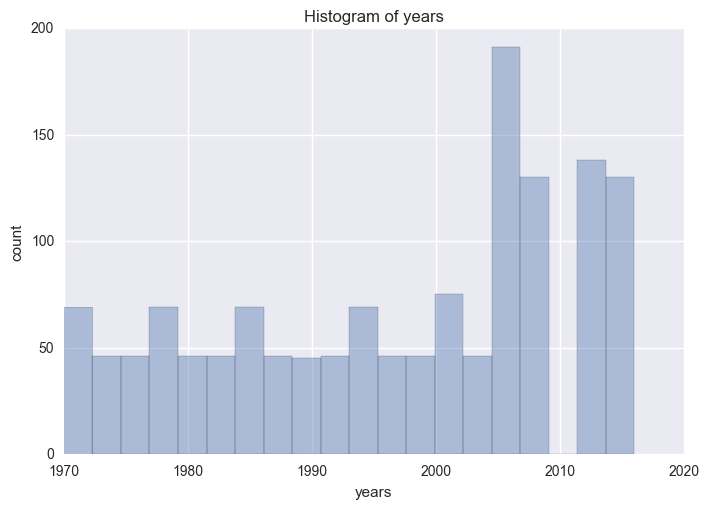

In [5]:
if button_plots.value:
    DataVisualizations.distPlot(overall_data['year'],'Histogram of years','years','count',20,False)

### Histogram of Happy Planet Index values

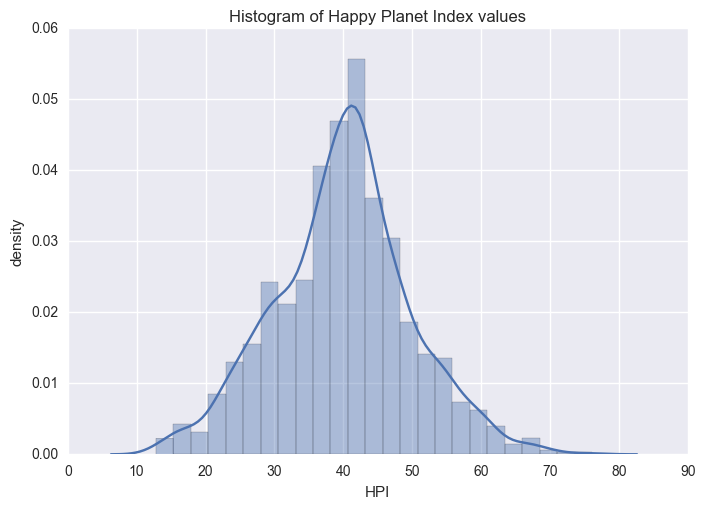

In [6]:
if button_plots.value:
    DataVisualizations.distPlot(overall_data['Happy Planet Index'],'Histogram of Happy Planet Index values','HPI','density',25,True)

### Drop columns and rows with %(nulls)>80%

In [7]:
THRESH = 0.2
overall_data = overall_data.dropna(1, thresh=(overall_data.shape[0] * (1 - THRESH)))
overall_data = overall_data.dropna(0, thresh=(overall_data.shape[1] * (1 - THRESH)))
overall_data.head(5)

,country,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)",...,"Population, male (% of total)","Population, total","School life expectancy, primary, both sexes (years)","School life expectancy, primary, female (years)","School life expectancy, primary, gender parity index (GPI)","School life expectancy, primary, male (years)",Theoretical duration of pre-primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Happy Planet Index
0,Afghanistan,2012.0,5767543.0,2348306.0,1.935220e+10,2.053654e+10,651.001852,690.842629,2.157185e+10,720.0,...,51.435962,29726803.0,6.53571,5.47000,0.72495,7.54532,4.0,6.0,6.0,36.8
2,Albania,2006.0,222402.0,107004.0,9.771760e+09,8.992642e+09,3265.365622,3005.012903,9.254605e+09,3090.0,...,50.260019,2992547.0,3.98375,3.97433,0.99544,3.99253,3.0,4.0,8.0,42.1
3,Albania,2009.0,236102.0,112399.0,1.150029e+10,1.204421e+10,3928.340828,4114.136545,1.185274e+10,4280.0,...,50.432577,2927519.0,4.80613,4.74382,0.97524,4.86425,3.0,5.0,7.0,47.9
4,Albania,2012.0,206617.0,97583.0,1.240477e+10,1.231978e+10,4277.143310,4247.839852,1.222802e+10,4360.0,...,50.128703,2900247.0,5.16259,5.09023,0.97326,5.23009,3.0,5.0,7.0,54.1
6,Algeria,2006.0,4196580.0,1973901.0,1.446470e+11,1.170270e+11,4285.934521,3467.544740,1.126050e+11,3100.0,...,50.489699,33749328.0,6.40438,6.17532,0.93223,6.62422,1.0,6.0,6.0,45.9


## 2. Data Visualization & Analysis

### Find Most Correlated features

In [8]:
HPI_correlation = overall_data[overall_data.columns[1:-1]].apply\
(lambda x: x.corr(overall_data['Happy Planet Index'], method='spearman'))
HPI_correlation = HPI_correlation.abs().sort_values(ascending=False)
HPI_correlation = pd.DataFrame({'Feature':HPI_correlation.index,\
                                'Correlation to Happy Planet Index':HPI_correlation.values})
HPI_correlation.head(5)

,Correlation to Happy Planet Index,Feature
0,0.244313,"Population, ages 15-64, female"
1,0.242787,Population of the official age for pre-primary...
2,0.242299,Population of the official age for pre-primary...
3,0.241668,Population of the official age for pre-primary...
4,0.241227,"Population, ages 15-64, total"


### Plot Correlation matrix, taken 2 positive and 2 negative most correlated features

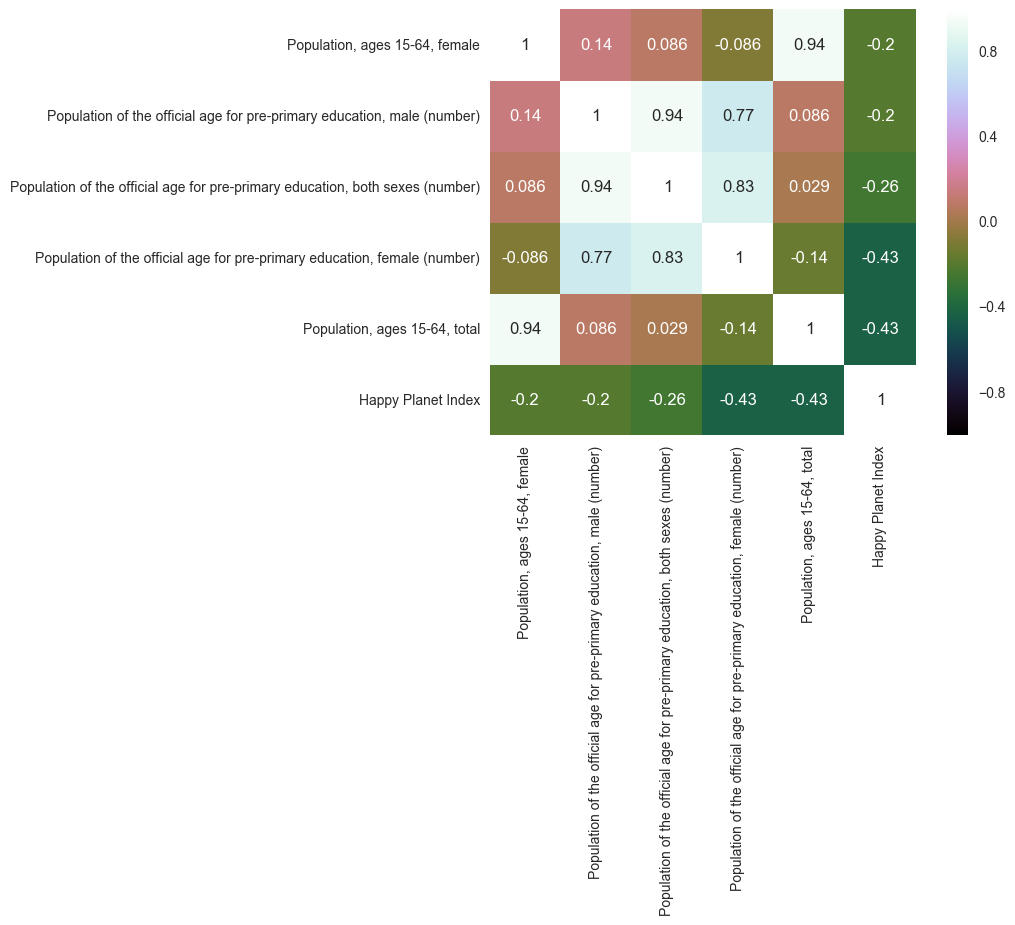

In [9]:
corr_features = HPI_correlation['Feature'].head(5).tolist() + ['Happy Planet Index']
corr_features = [x for x in corr_features if x != 'year']
overall_data_to_plot = overall_data[corr_features]
data_corr_mat= overall_data_to_plot.corr(method='spearman')
c = data_corr_mat.corr(method='spearman')
if button_plots.value:
    sns.heatmap(c, vmax=1, square=True, annot=True, cmap='cubehelix')

# Plotting Data on world map

## Plotting the Happy Planet Index over the globe

In [10]:
if button_plots.value:
    MapVisualizations.interactMaps(overall_data,corr_features)

Please choose an option


### Impute nulls with medians

In [11]:
overall_data = overall_data.fillna(overall_data.median())
overall_data.head(5)

,country,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)",...,"Population, male (% of total)","Population, total","School life expectancy, primary, both sexes (years)","School life expectancy, primary, female (years)","School life expectancy, primary, gender parity index (GPI)","School life expectancy, primary, male (years)",Theoretical duration of pre-primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Happy Planet Index
0,Afghanistan,2012.0,5767543.0,2348306.0,1.935220e+10,2.053654e+10,651.001852,690.842629,2.157185e+10,720.0,...,51.435962,29726803.0,6.53571,5.47000,0.72495,7.54532,4.0,6.0,6.0,36.8
2,Albania,2006.0,222402.0,107004.0,9.771760e+09,8.992642e+09,3265.365622,3005.012903,9.254605e+09,3090.0,...,50.260019,2992547.0,3.98375,3.97433,0.99544,3.99253,3.0,4.0,8.0,42.1
3,Albania,2009.0,236102.0,112399.0,1.150029e+10,1.204421e+10,3928.340828,4114.136545,1.185274e+10,4280.0,...,50.432577,2927519.0,4.80613,4.74382,0.97524,4.86425,3.0,5.0,7.0,47.9
4,Albania,2012.0,206617.0,97583.0,1.240477e+10,1.231978e+10,4277.143310,4247.839852,1.222802e+10,4360.0,...,50.128703,2900247.0,5.16259,5.09023,0.97326,5.23009,3.0,5.0,7.0,54.1
6,Algeria,2006.0,4196580.0,1973901.0,1.446470e+11,1.170270e+11,4285.934521,3467.544740,1.126050e+11,3100.0,...,50.489699,33749328.0,6.40438,6.17532,0.93223,6.62422,1.0,6.0,6.0,45.9


### One Hot Encoding Foreach Country

In [12]:
overall_data_countries = overall_data['country']
oh_overall_data = overall_data.drop('country', axis=1)
onehot_overall_col = pd.get_dummies(overall_data['country'], prefix='country')

#check for missing cols in onehot_overall_col
for col in onehot_overall_col.columns:
    if col not in onehot_overall_col.columns:
        onehot_overall_col[col] = 0
        
oh_overall_data = pd.concat([oh_overall_data, onehot_overall_col], axis=1)
overall_data = oh_overall_data
overall_data['country'] = overall_data_countries
overall_data.head(5)

,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Gross enrolment ratio, primary, both sexes (%)",...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Zambia,country_Zimbabwe,country
0,2012.0,5767543.0,2348306.0,1.935220e+10,2.053654e+10,651.001852,690.842629,2.157185e+10,720.0,108.928520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan
2,2006.0,222402.0,107004.0,9.771760e+09,8.992642e+09,3265.365622,3005.012903,9.254605e+09,3090.0,99.593842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Albania
3,2009.0,236102.0,112399.0,1.150029e+10,1.204421e+10,3928.340828,4114.136545,1.185274e+10,4280.0,97.525330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Albania
4,2012.0,206617.0,97583.0,1.240477e+10,1.231978e+10,4277.143310,4247.839852,1.222802e+10,4360.0,104.784393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Albania
6,2006.0,4196580.0,1973901.0,1.446470e+11,1.170270e+11,4285.934521,3467.544740,1.126050e+11,3100.0,108.287209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Algeria


## Split Data randomly into training set and test set

In [13]:
train_data, test_data = train_test_split\
(overall_data, test_size = 0.2, random_state=0)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
#split for prediction of Israel
train_second = overall_data.copy()
train_data.head(5)

,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Gross enrolment ratio, primary, both sexes (%)",...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Zambia,country_Zimbabwe,country
0,2009.0,406920.0,200909.0,1.063964e+10,8.876191e+09,4943.249801,4123.939997,8.708821e+09,4120.0,108.228012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Namibia
1,1985.0,420665.0,205210.0,6.420870e+10,2.129391e+10,18147.884040,6018.489552,1.983712e+10,5630.0,95.102722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ireland
2,1984.0,888440.0,430238.0,1.813080e+11,4.802002e+10,18321.674990,4852.565728,4.851687e+10,5130.0,105.983048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Greece
3,1991.0,2820497.0,1366826.0,8.954290e+11,5.755990e+11,22995.652240,14782.038900,5.713820e+11,13720.0,105.279709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spain
4,2006.0,364263.0,161875.0,2.179437e+09,1.211162e+09,506.323083,281.375017,1.202459e+09,280.0,68.011917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Eritrea


### Partition factors, class and countries

In [14]:
train_countries = train_data['country']
train_class = train_data['Happy Planet Index']
train_factors = (train_data.drop(['Happy Planet Index', 'country'], axis=1))

test_countries = test_data['country']
test_class = test_data['Happy Planet Index']
test_factors =(test_data.drop(['Happy Planet Index', 'country'], axis=1))

train_factors.head(5)

,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Gross enrolment ratio, primary, both sexes (%)",...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Zambia,country_Zimbabwe
0,2009.0,406920.0,200909.0,1.063964e+10,8.876191e+09,4943.249801,4123.939997,8.708821e+09,4120.0,108.228012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1985.0,420665.0,205210.0,6.420870e+10,2.129391e+10,18147.884040,6018.489552,1.983712e+10,5630.0,95.102722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1984.0,888440.0,430238.0,1.813080e+11,4.802002e+10,18321.674990,4852.565728,4.851687e+10,5130.0,105.983048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1991.0,2820497.0,1366826.0,8.954290e+11,5.755990e+11,22995.652240,14782.038900,5.713820e+11,13720.0,105.279709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2006.0,364263.0,161875.0,2.179437e+09,1.211162e+09,506.323083,281.375017,1.202459e+09,280.0,68.011917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Binning The Years by Decades

In [15]:
min_year = min(min(train_factors['year']), min(test_factors['year']))

train_factors['year'] = train_factors['year'].apply(lambda x:math.floor((x-min_year) / 10))
test_factors['year'] = test_factors['year'].apply(lambda x:math.floor((x-min_year) / 10))

train_factors.head(5)

,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Gross enrolment ratio, primary, both sexes (%)",...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Zambia,country_Zimbabwe
0,3,406920.0,200909.0,1.063964e+10,8.876191e+09,4943.249801,4123.939997,8.708821e+09,4120.0,108.228012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,420665.0,205210.0,6.420870e+10,2.129391e+10,18147.884040,6018.489552,1.983712e+10,5630.0,95.102722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,888440.0,430238.0,1.813080e+11,4.802002e+10,18321.674990,4852.565728,4.851687e+10,5130.0,105.983048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2820497.0,1366826.0,8.954290e+11,5.755990e+11,22995.652240,14782.038900,5.713820e+11,13720.0,105.279709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,364263.0,161875.0,2.179437e+09,1.211162e+09,506.323083,281.375017,1.202459e+09,280.0,68.011917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Change all numeric values' datatypes to float

In [16]:
train_factors = train_factors.astype(np.float)
test_factors = test_factors.astype(np.float)
train_factors.dtypes[:5]

year                                                   float64
Enrolment in primary education, both sexes (number)    float64
Enrolment in primary education, female (number)        float64
GDP at market prices (constant 2005 US$)               float64
GDP at market prices (current US$)                     float64
dtype: object

In [17]:
alternativeModles = creatAlternativeModels(train_data, train_factors, train_class, train_countries, test_data, test_factors,\
                                       test_class, test_countries)

### Data linearity proving

Applying OLS on train data and checking model assumptions
train R^2: 0.8641 
residuals appear to behave randomly, it suggests that the linear model fits the data well


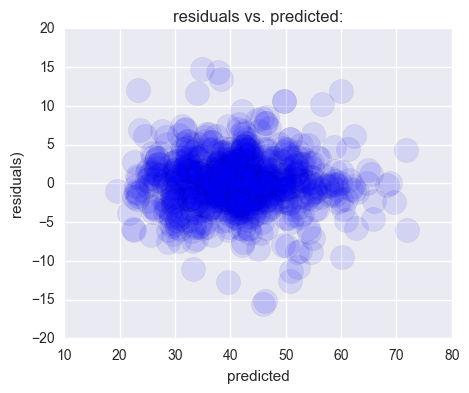

residuals appear to be normally distributed


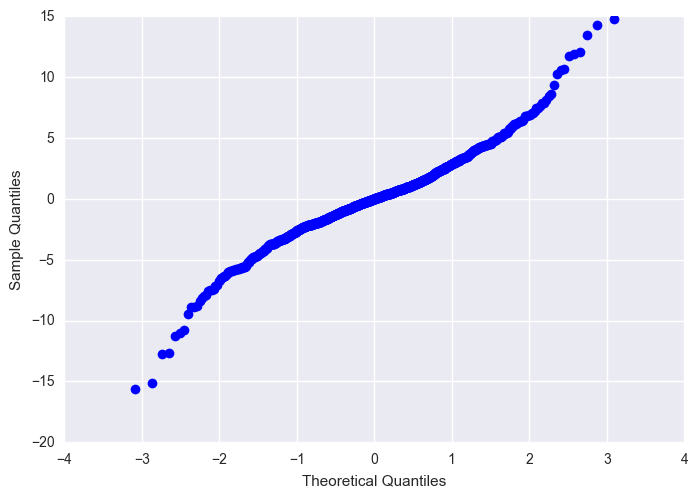

In [18]:
OutliersDetection.linearityProving(train_factors, train_class, button_plots.value)

In [19]:
interact(OutliersDetection.allDataLinearityProving,\
             request=RadioButtons(options=  ['None']+dataTypes,\
                                  description='Select data type for linearity check:', disabled=False))


Please choose an option


<function utilities.OutliersDetection.allDataLinearityProving>

## Centering and Scaling nomeric features, and removing features with: $STD\approx0$ 

In [20]:
train_factors = pd.DataFrame(sp.StandardScaler().fit_transform(train_factors),columns = train_factors.columns)
test_factors = pd.DataFrame(sp.StandardScaler().fit_transform(test_factors),columns = test_factors.columns)
train_factors.head(5)

,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Gross enrolment ratio, primary, both sexes (%)",...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Zambia,country_Zimbabwe
0,0.780879,-0.287638,-0.296172,-0.514255,-0.378689,-1.064374,-0.728401,-0.374095,-0.745905,0.612859,...,-0.063758,-0.045038,-0.176961,-0.055188,-0.055188,-0.045038,-0.03183,-0.063758,-0.03183,-0.055188
1,-0.782461,-0.286277,-0.295247,-0.471274,-0.367663,-0.355682,-0.598975,-0.364349,-0.637493,-0.809469,...,-0.063758,-0.045038,-0.176961,-0.055188,-0.055188,-0.045038,-0.03183,-0.063758,-0.03183,-0.055188
2,-0.782461,-0.239970,-0.246859,-0.377320,-0.343932,-0.346354,-0.678625,-0.339231,-0.673391,0.369583,...,-0.063758,-0.045038,-0.176961,-0.055188,-0.055188,-0.045038,-0.03183,-0.063758,-0.03183,-0.055188
3,-0.000791,-0.048709,-0.045464,0.195653,0.124527,-0.095502,-0.000298,0.118704,-0.056662,0.293365,...,-0.063758,-0.045038,-0.176961,-0.055188,-0.055188,-0.045038,-0.03183,-0.063758,-0.03183,-0.055188
4,0.780879,-0.291860,-0.304565,-0.521043,-0.385495,-1.302503,-0.990904,-0.380670,-1.021603,-3.745178,...,-0.063758,-0.045038,-0.176961,-0.055188,-0.055188,-0.045038,-0.03183,-0.063758,-0.03183,-0.055188


In [21]:
for data in dataTypes:
    alternativeModles[data].train_factors = \
            pd.DataFrame(sp.StandardScaler().fit_transform(alternativeModles[data].train_factors),columns =\
                                          alternativeModles[data].train_factors.columns)
    alternativeModles[data].test_factors = \
            pd.DataFrame(sp.StandardScaler().fit_transform(alternativeModles[data].test_factors),columns =\
                                          alternativeModles[data].test_factors.columns)
updateAlternativeModles(alternativeModles)

## Outliers Detection

Stage 0
validation R^2, 0.9128 


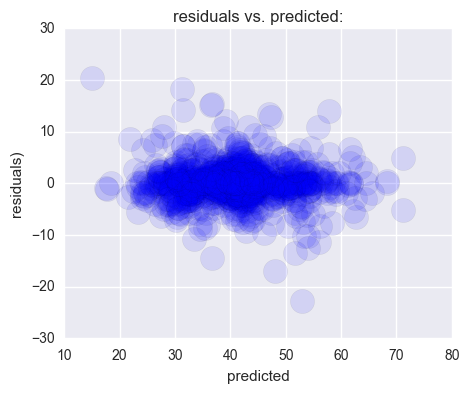

44 rows were dropped
After final stage
validation R^2, 0.9561 


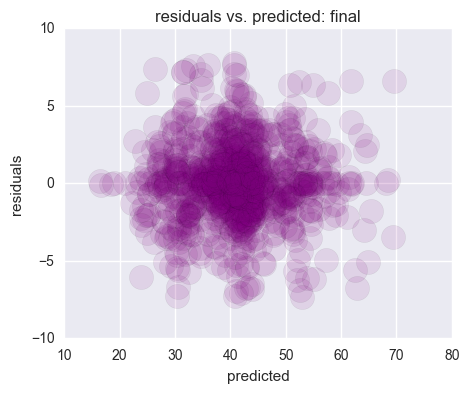

In [22]:
train_factors, train_class, train_data =\
OutliersDetection.removeOutliersRlm(train_factors, train_class, train_data, 1, button_plots.value)

Stage 0
validation R^2, 0.4555 


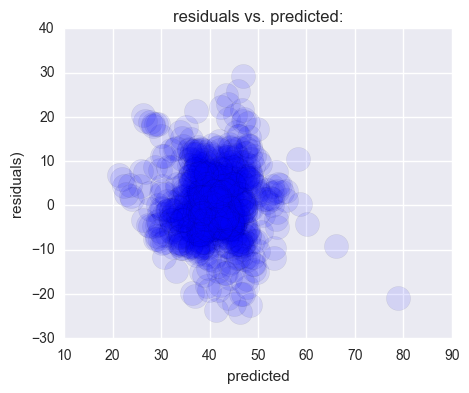

49 rows were dropped
After final stage
validation R^2, 0.5875 


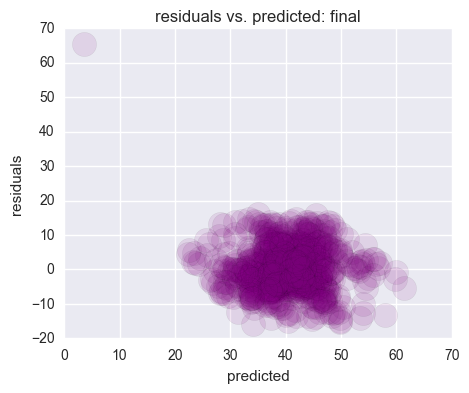

Stage 0
validation R^2, 0.8878 


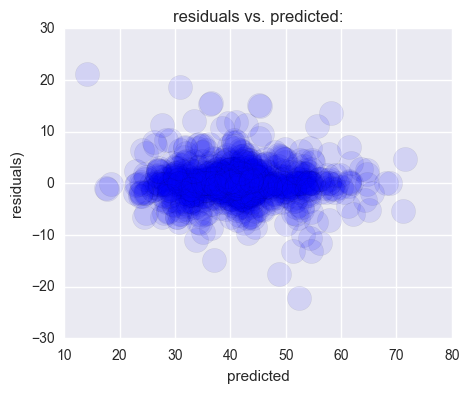

38 rows were dropped
After final stage
validation R^2, 0.9554 


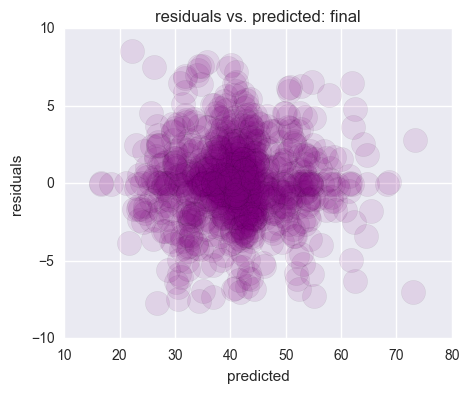

In [23]:
for data in dataTypes:
    alternativeModles[data].train_factors, alternativeModles[data].train_class, alternativeModles[data].train_data =\
                                OutliersDetection.removeOutliersRlm(alternativeModles[data].train_factors, \
                                                                    alternativeModles[data].train_class, \
                                                                alternativeModles[data].train_data, 1, button_plots.value)
updateAlternativeModles(alternativeModles)

## Apply PCA for data visualizaion

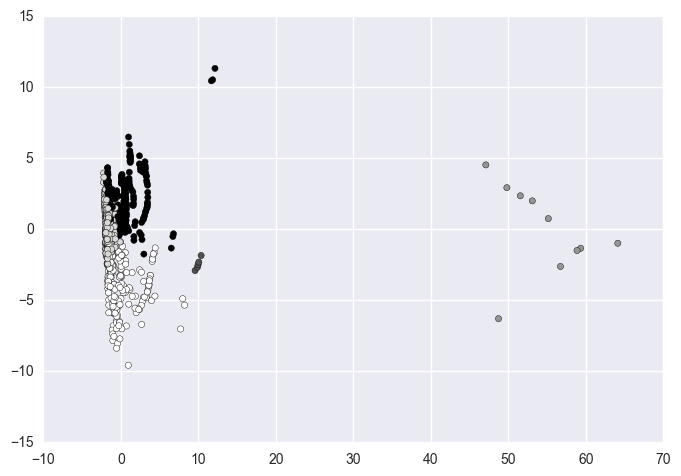

In [24]:
plot_columns, labels = DataVisualizations.twoDimPCAandClustering(train_factors, button_plots.value)

In [25]:
PCAAltModels = dict([(data,(DataVisualizations.twoDimPCAandClustering(alternativeModles[data].train_factors,\
                                                                      False))) for data in dataTypes])
updateAlternativeModles(alternativeModles)

## Print outliers countries

In [26]:
outliers_indecies = np.where(plot_columns[:,0] > 20)[0].tolist()
outliers_df = train_data.loc[outliers_indecies, :]
outliers_df['country'].head(min(10, len(outliers_indecies)))

17     India
256    China
259    India
300    China
426    China
432    India
451    China
636    China
730    China
800    India
Name: country, dtype: object

In [27]:
outliers_indecies_AltModels = dict([(data,np.where(PCAAltModels[data][0][:,0] > 20)[0].tolist()) for data in dataTypes])
outliers_df_AltModels = dict([(data,alternativeModles[data].train_data.loc[outliers_indecies_AltModels[data], :]) for data \
                             in dataTypes])
OutliersDetection.printOutlierCountries(outliers_df_AltModels,outliers_indecies_AltModels)

Please choose an option


### Remove visible outliers if reducing aquracy

In [28]:
train_factors, train_class, train_data =\
OutliersDetection.removeOutliersPCA(train_factors, train_class, train_data, outliers_indecies, button_plots.value)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


R^2 on validation set with outliers: 0.904946241467 , and without outliers: 0.910812702711
Leaving outliers in the training set.


In [29]:
for data in dataTypes:
    print(data+" run:")
    alternativeModles[data].train_factors, alternativeModles[data].train_class, alternativeModles[data].train_data =\
                                OutliersDetection.removeOutliersPCA(alternativeModles[data].train_factors,\
                                                                    alternativeModles[data].train_class,\
                                                                    alternativeModles[data].train_data,\
                                                                    outliers_indecies_AltModels[data], False)
updateAlternativeModles(alternativeModles)

no countries run:


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


R^2 on validation set with outliers: 0.410568418316 , and without outliers: 0.458319744672
Leaving outliers in the training set.
no years run:


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


R^2 on validation set with outliers: 0.900838982776 , and without outliers: 0.905329255707
Leaving outliers in the training set.


## Feature selection with E.Net model

In [30]:
# run elastic model for feature selection 
enet = ElasticNetCV(max_iter=5000, cv=5, n_jobs=-1)
enet.fit(train_factors, train_class)

sfm = fs.SelectFromModel(enet, prefit=True)
chosen_features_and_coefs = [(train_factors.columns[i],enet.coef_[i]) for i in sfm.get_support(True)]

chosen_features_and_coefs.sort(key=lambda x:abs(x[1]), reverse=True)
headers = [['correlated feature', 'coefficient value']]
data = headers + [[x[0], x[1]]\
                  for x in chosen_features_and_coefs if not x[0].startswith('country_')]
headers = data.pop(0) # gives the headers as list and leaves data
table = pd.DataFrame(data, columns=headers)
print("Enet Strong factors (no countries) are: ")
table.head(table.shape[0])

Enet Strong factors (no countries) are: 


,correlated feature,coefficient value
0,Official entrance age to primary education (ye...,-1.048629
1,year,0.868307
2,Population growth (annual %),-0.756785
3,"GNI per capita, Atlas method (current US$)",0.720074
4,Official entrance age to pre-primary education...,-0.692780
5,"School life expectancy, primary, both sexes (y...",-0.637872
6,"Gross enrolment ratio, primary, male (%)",0.467818
7,Theoretical duration of secondary education (y...,-0.354008
8,"Mortality rate, under-5 (per 1,000)",-0.342744


In [31]:
chosen_features_and_coefs_AltModels = dict([(data,chosen_features_and_coefs) for data in dataTypes])
for data in dataTypes:
    # run elastic model for feature selection 
    enet = ElasticNetCV(max_iter=5000, cv=5, n_jobs=-1)
    enet.fit(alternativeModles[data].train_factors, alternativeModles[data].train_class)

    sfm = fs.SelectFromModel(enet, prefit=True)
    chosen_features_and_coefs_AltModels[data] = [(alternativeModles[data].train_factors.columns[i],enet.coef_[i]) for i in sfm.get_support(True)]

    chosen_features_and_coefs_AltModels[data].sort(key=lambda x:abs(x[1]), reverse=True)
    headers = [['correlated feature', 'coefficient value']]
    curData = headers + [[x[0], x[1]]\
                      for x in chosen_features_and_coefs_AltModels[data] if not x[0].startswith('country_')]
    headers = curData.pop(0) # gives the headers as list and leaves data
    table = pd.DataFrame(curData, columns=headers)
    print("Enet Strong factors for data:",data," are: ")
    print(table.head(table.shape[0]))

Enet Strong factors for data: no countries  are: 
                                   correlated feature  coefficient value
0                  GDP per capita (constant 2005 US$)          -5.497733
1                 Mortality rate, under-5 (per 1,000)          -4.189604
2          GNI per capita, Atlas method (current US$)           3.075171
3                  Population, ages 0-14 (% of total)           2.395852
4   Theoretical duration of secondary education (y...          -1.334437
5   Population of the official age for primary edu...           1.300474
6                        GDP per capita (current US$)           1.299659
7   Population of the official age for pre-primary...          -1.144426
8   Theoretical duration of primary education (years)          -1.078718
9                        Population growth (annual %)          -1.064598
10     Gross enrolment ratio, primary, both sexes (%)           1.002493
11                      Population, ages 0-14, female           0.998089
1

## Countries correlated to target plot

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


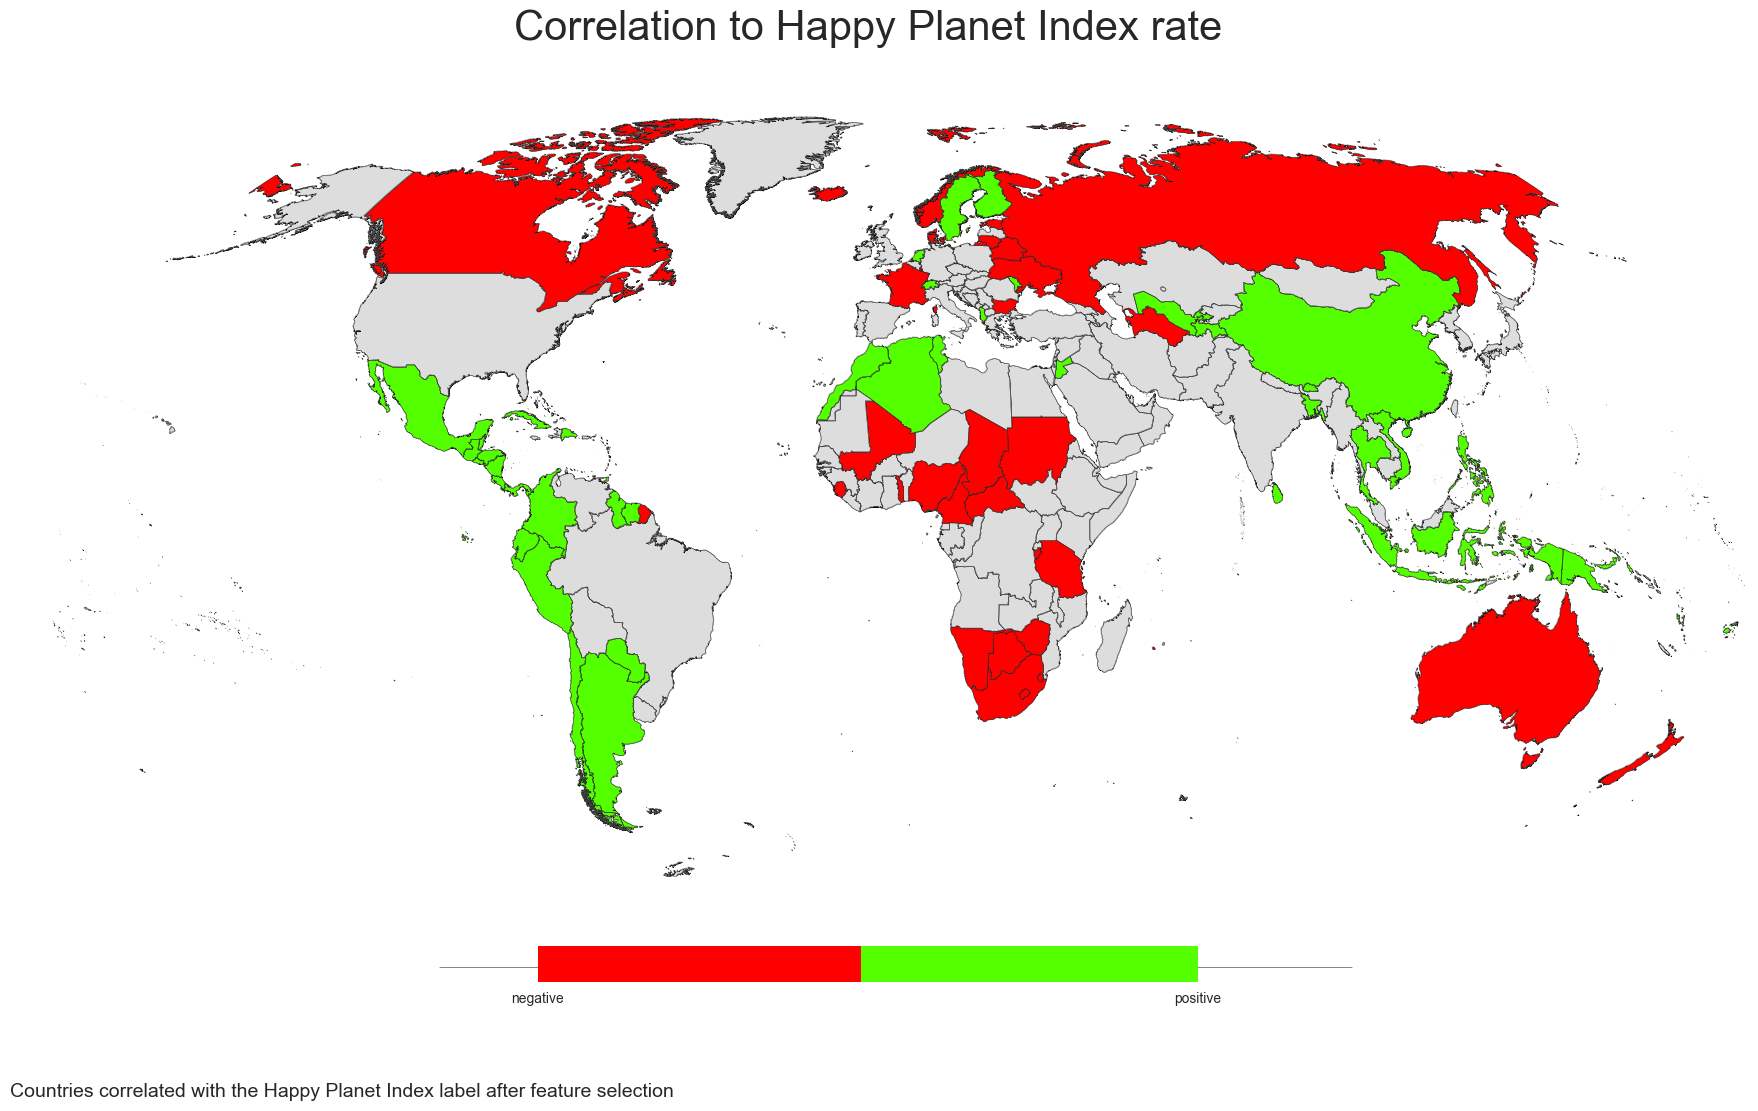

In [32]:
if button_plots.value:
    headers = [['country', 'Correlation to Happy Planet Index']]
    data = headers + [[x[0].split('country_')[1], np.sign(x[1])]\
                      for x in chosen_features_and_coefs if x[0].startswith('country_')]
    headers = data.pop(0) # gives the headers as list and leaves data
    df = pd.DataFrame(data, columns=headers)
    MapVisualizations.plotDataOnMap(df, year='mean', feature="Correlation to Happy Planet Index", binary=True,\
                  descripton='Countries correlated with the Happy Planet Index label after feature selection')

### Take remaining features

In [33]:
chosen_features = [x[0] for x in chosen_features_and_coefs]
train_factors = train_factors[chosen_features]
test_factors = test_factors[chosen_features]
train_factors.head(5)

,country_Mexico,country_Luxembourg,country_Switzerland,country_Sweden,country_Vietnam,country_Norway,country_Costa Rica,country_Guatemala,country_New Zealand,country_Netherlands,...,country_Uzbekistan,country_Timor-Leste,country_Paraguay,country_Cameroon,country_Mali,country_Papua New Guinea,country_Algeria,country_Malta,Theoretical duration of secondary education (years),"Mortality rate, under-5 (per 1,000)"
0,-0.176961,-0.170783,-0.170783,-0.167618,-0.063758,-0.176961,-0.045038,-0.055188,-0.170783,-0.17998,...,-0.045038,-0.03183,-0.055188,-0.055188,-0.055188,-0.03183,-0.045038,-0.045038,-1.698836,1.091002
1,-0.176961,-0.170783,-0.170783,-0.167618,-0.063758,-0.176961,-0.045038,-0.055188,-0.170783,-0.17998,...,-0.045038,-0.03183,-0.055188,-0.055188,-0.055188,-0.03183,-0.045038,-0.045038,-1.698836,-0.416986
2,-0.176961,-0.170783,-0.170783,-0.167618,-0.063758,-0.176961,-0.045038,-0.055188,-0.170783,-0.17998,...,-0.045038,-0.03183,-0.055188,-0.055188,-0.055188,-0.03183,-0.045038,-0.045038,-0.551570,-0.161284
3,-0.176961,-0.170783,-0.170783,-0.167618,-0.063758,-0.176961,-0.045038,-0.055188,-0.170783,-0.17998,...,-0.045038,-0.03183,-0.055188,-0.055188,-0.055188,-0.03183,-0.045038,-0.045038,0.595696,-0.423543
4,-0.176961,-0.170783,-0.170783,-0.167618,-0.063758,-0.176961,-0.045038,-0.055188,-0.170783,-0.17998,...,-0.045038,-0.03183,-0.055188,-0.055188,-0.055188,-0.03183,-0.045038,-0.045038,0.595696,1.405713


In [34]:
for data in dataTypes:
    chosen_features = [x[0] for x in chosen_features_and_coefs_AltModels[data]]
    alternativeModles[data].train_factors = alternativeModles[data].train_factors[chosen_features]
    alternativeModles[data].test_factors = alternativeModles[data].test_factors[chosen_features]

### Apply PCA after feature selection

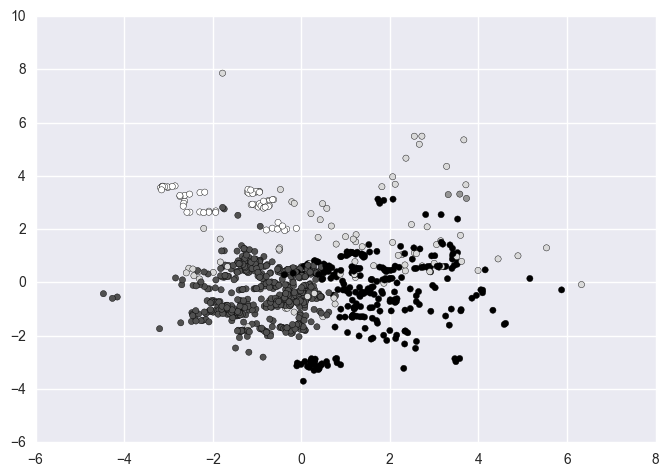

In [35]:
plot_columns, labels = DataVisualizations.twoDimPCAandClustering(train_factors, button_plots.value)

In [36]:
PCAAltModels = dict([(data,(DataVisualizations.twoDimPCAandClustering(alternativeModles[data].train_factors,\
                                                                      False))) for data in dataTypes])
updateAlternativeModles(alternativeModles)

## Features extraction

In [37]:
poly = sp.PolynomialFeatures(2, include_bias=False)
transf_train = poly.fit_transform(train_factors)
transf_test = poly.fit_transform(test_factors)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(train_factors.columns,p) for p in poly.powers_]]
train_factors_after_extracion = (pd.DataFrame(transf_train, columns = target_feature_names))
test_factors_after_extracion = (pd.DataFrame(transf_test, columns = target_feature_names))
train_factors_after_extracion.head(5)

,country_Mexico^1,country_Luxembourg^1,country_Switzerland^1,country_Sweden^1,country_Vietnam^1,country_Norway^1,country_Costa Rica^1,country_Guatemala^1,country_New Zealand^1,country_Netherlands^1,...,country_Algeria^2,country_Algeria^1xcountry_Malta^1,country_Algeria^1xTheoretical duration of secondary education (years)^1,"country_Algeria^1xMortality rate, under-5 (per 1,000)^1",country_Malta^2,country_Malta^1xTheoretical duration of secondary education (years)^1,"country_Malta^1xMortality rate, under-5 (per 1,000)^1",Theoretical duration of secondary education (years)^2,"Theoretical duration of secondary education (years)^1xMortality rate, under-5 (per 1,000)^1","Mortality rate, under-5 (per 1,000)^2"
0,-0.176961,-0.170783,-0.170783,-0.167618,-0.063758,-0.176961,-0.045038,-0.055188,-0.170783,-0.17998,...,0.002028,0.002028,0.076512,-0.049136,0.002028,0.076512,-0.049136,2.886045,-1.853434,1.190285
1,-0.176961,-0.170783,-0.170783,-0.167618,-0.063758,-0.176961,-0.045038,-0.055188,-0.170783,-0.17998,...,0.002028,0.002028,0.076512,0.018780,0.002028,0.076512,0.018780,2.886045,0.708391,0.173877
2,-0.176961,-0.170783,-0.170783,-0.167618,-0.063758,-0.176961,-0.045038,-0.055188,-0.170783,-0.17998,...,0.002028,0.002028,0.024841,0.007264,0.002028,0.024841,0.007264,0.304230,0.088959,0.026012
3,-0.176961,-0.170783,-0.170783,-0.167618,-0.063758,-0.176961,-0.045038,-0.055188,-0.170783,-0.17998,...,0.002028,0.002028,-0.026829,0.019075,0.002028,-0.026829,0.019075,0.354854,-0.252303,0.179388
4,-0.176961,-0.170783,-0.170783,-0.167618,-0.063758,-0.176961,-0.045038,-0.055188,-0.170783,-0.17998,...,0.002028,0.002028,-0.026829,-0.063310,0.002028,-0.026829,-0.063310,0.354854,0.837377,1.976028


## Correlations between target and extracted features

In [38]:
poly = sp.PolynomialFeatures(2, include_bias=False)
transf_train = poly.fit_transform(train_factors)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(train_factors.columns,p) for p in poly.powers_]]
train_factors_after_extracion = (pd.DataFrame(transf_train, columns = target_feature_names))

max_corr_before = HPI_correlation['Correlation to Happy Planet Index'].iloc[0]
HPI_correlation_feature_extraction = train_factors_after_extracion[train_factors_after_extracion.columns[:]].apply\
(lambda x: x.corr(train_data['Happy Planet Index'], method='spearman'))
HPI_correlation_feature_extraction = HPI_correlation_feature_extraction.abs().sort_values(ascending=False)
HPI_correlation_feature_extraction = pd.DataFrame({'Feature':HPI_correlation_feature_extraction.index,\
                                'Correlation to Happy Planet Index':HPI_correlation_feature_extraction.values})
HPI_correlation_feature_extraction = HPI_correlation_feature_extraction.loc\
[(HPI_correlation_feature_extraction["Correlation to Happy Planet Index"] > max_corr_before) \
 & ((HPI_correlation_feature_extraction["Feature"].str.count("\^") == 2) | ((HPI_correlation_feature_extraction["Feature"].str.count("\^2") == 1)))]
print('There are', HPI_correlation_feature_extraction.shape[0],\
      'new features that are more corrolative to target then old features and many other new very correlative features')
HPI_correlation_feature_extraction.head(5)

There are 93 new features that are more corrolative to target then old features and many other new very correlative features


,Correlation to Happy Planet Index,Feature
0,0.322989,country_Luxembourg^1xcountry_Denmark^1
1,0.319492,country_Luxembourg^1xcountry_Norway^1
2,0.312567,country_Luxembourg^1xcountry_Australia^1
3,0.307399,country_Mexico^1xcountry_Netherlands^1
4,0.305112,country_Mexico^1xcountry_Switzerland^1


# Model

## Kernel Ridge Regression - Our main model

In [39]:
param_grid_for_kridge = {'alpha': [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12],\
              'gamma': [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]}
model = GridSearchCV(KernelRidge(kernel='polynomial', degree=2),\
                     cv=5, param_grid=param_grid_for_kridge, n_jobs=-1, verbose=1)

ridgeKernelResults = ResultsMeasurements(button_exec.value, train_data,test_data,train_factors,test_factors,\
                                         train_class,test_class,model,'kernel ridge resgression')
print(train_data.shape,test_data.shape,train_factors.shape,test_factors.shape,\
                                         train_class.shape,test_class.shape)
ridgeKernelResults.interactResults()


Please choose an option


# Model Evaluation

## Linear Regression

In [40]:
lr = LinearRegression()
linearRegResults = ResultsMeasurements(not(button_exec.value), train_data,test_data,train_factors,test_factors,\
                                       train_class,test_class,lr , 'linear regression')
linearRegResults.interactResults()

Please choose an option


## Lasso Regression

In [41]:
lasso = linear_model.Lasso(alpha=0.1)
lassoResults = ResultsMeasurements(button_exec.value, train_data,test_data,train_factors,test_factors,\
                                   train_class,test_class,lasso, 'lasso resgression')
lassoResults.interactResults()


Please choose an option


## Ridge Regression

In [42]:
ridge = Ridge(alpha=1.0)
ridgeResults = ResultsMeasurements(button_exec.value, train_data,test_data,train_factors,test_factors,\
                                   train_class,test_class,ridge,'ridge resgression')
ridgeResults.interactResults()


Please choose an option


## Random Forest - The Chosen Model

In [43]:
param_grid_for_random_forest = {'max_features': [None, 'sqrt', 'log2'],\
                    'n_estimators': [500, 1000, 1500], 'max_depth': [None, 1, 5, 10, 50], 'min_samples_split':\
                    [2, 3, 4, 5], 'min_samples_leaf':[1, 3, 5, 7, 9]}
clf = GridSearchCV(RandomForestRegressor(), param_grid=param_grid_for_random_forest, cv=5,
                  n_jobs=-1, verbose=1)
randomForestResults = ResultsMeasurements(button_exec.value, train_data,test_data,train_factors,test_factors,\
                                          train_class,test_class,clf,'random forest resgression')
randomForestResults.interactResults()

Please choose an option


In [56]:
results = dict([(data,0) for data in dataTypes])
for data in dataTypes:
    results[data] = ResultsMeasurements(False, alternativeModles[data].train_data,\
                                             alternativeModles[data].test_data,\
                                             alternativeModles[data].train_factors,\
                                             alternativeModles[data].test_factors,\
                                             alternativeModles[data].train_class,\
                                             alternativeModles[data].test_class,\
                                             clf,'random forest resgression '+data)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 45.6min finished


insideeeee
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 35.8min finished


insideeeee


In [51]:
print(results['no countries'].trainFactors.shape)
print(results['no countries'].trainRelevantData['label'].shape)

(939, 22)
(939,)


In [52]:
results['no countries'].interactResults()

insideeee2
self.trainFactors: (939, 22) self.trainRelevantData['label'] (939,)


ValueError: shapes (939,22) and (86,) not aligned: 22 (dim 1) != 86 (dim 0)

In [53]:
results['no years'].interactResults()

insideeee2
self.trainFactors: (950, 86) self.trainRelevantData['label'] (950,)
self.testFactors: (247, 86) self.testRelevantData['label'] (247,)
R^2 for Train data = 0.84670118277
R^2 for Test data = 0.602786276136


In [54]:
data='no years'
print(alternativeModles[data].train_data.shape,\
                                             alternativeModles[data].test_data.shape,\
                                             alternativeModles[data].train_factors.shape,\
                                             alternativeModles[data].test_factors.shape,\
                                             alternativeModles[data].train_class.shape,\
                                             alternativeModles[data].test_class.shape)

(950, 224) (247, 224) (950, 86) (247, 86) (950,) (247,)


In [55]:
data='no countries'
print(alternativeModles[data].train_data.shape,\
                                             alternativeModles[data].test_data.shape,\
                                             alternativeModles[data].train_factors.shape,\
                                             alternativeModles[data].test_factors.shape,\
                                             alternativeModles[data].train_class.shape,\
                                             alternativeModles[data].test_class.shape)

(939, 224) (247, 224) (939, 22) (247, 22) (939,) (247,)
